Import Both input and response file

In [1]:
#!pip install pandas
import pandas as pd
pd.set_option('display.max_rows', None)
df_input = pd.read_csv('example_explanatory_variables.csv')
df_output = pd.read_csv('example_response_variable.csv')
X = df_input
y= df_output['V1']
X
print(X.Orientation)

0      3
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     3
12     3
13     3
14     3
15     3
16     3
17     3
18     3
19     3
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     3
34     3
35     3
36     5
37     5
38     5
39     5
40     5
41     5
42     5
43     5
44     5
45     5
46     5
47     5
48     5
49     5
50     5
51     5
52     5
53     5
54     5
55     5
56     5
57     5
58     5
59     5
60     5
61     5
62     5
63     5
64     5
65     5
66     5
67     5
68     5
69     5
70     5
71     5
72     3
73     3
74     3
75     3
76     3
77     3
78     3
79     3
80     3
81     3
82     3
83     3
84     3
85     3
86     3
87     3
88     3
89     3
90     3
91     3
92     3
93     3
94     3
95     3
96     3
97     3
98     3
99     3
100    3
101    3
102    3
103    3
104    3
105    3
106    3
107    3
108    5
109    5
110    5
1

Replace elements

In [2]:
X['Orientation'] = X.Orientation.astype(str)
Ori = pd.get_dummies(X.Orientation)
X = X.join(Ori)
X.dtypes 
X = X.drop('Orientation' ,axis = 1)

Bk = pd.get_dummies(X.Backbone)
X = X.join(Bk)
X = X.drop('Backbone', axis = 1 )

OD = pd.get_dummies(X.OligoDensity)
X = X.join(OD)
X = X.drop('OligoDensity', axis = 1)

AT = pd.get_dummies(X.Attachment)
X = X.join(AT)
X = X.drop('Attachment', axis = 1)

X.loc[(X.Lipid == '100%'), 'Lipid' ] = 1
X.loc[(X.Lipid == '80%'), 'Lipid' ] = 0.8

X

,Size,Lipid,PeptideDensity,OligoConc,3,5,PO,PS,High,Low,VHigh,Chol,DOPE
0,50,1,0.00,1,1,0,1,0,0,1,0,1,0
1,80,1,0.00,1,1,0,1,0,0,1,0,1,0
2,50,1,0.05,1,1,0,1,0,0,1,0,1,0
3,80,1,0.05,1,1,0,1,0,0,1,0,1,0
4,50,1,0.50,1,1,0,1,0,0,1,0,1,0
5,80,1,0.50,1,1,0,1,0,0,1,0,1,0
6,50,0.8,0.00,1,1,0,1,0,0,1,0,1,0
7,80,0.8,0.00,1,1,0,1,0,0,1,0,1,0
8,50,0.8,0.05,1,1,0,1,0,0,1,0,1,0
9,80,0.8,0.05,1,1,0,1,0,0,1,0,1,0


In [3]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr

LinearRegression()

In [4]:
print(regr.coef_)

[  0.14379197   9.55878646 -21.39492038   0.45993136 -25.52337485
  25.52337485 -26.52593735  26.52593735   1.48264132   8.7866066
 -10.26924792  72.36682682 -72.36682682]


In [5]:
Pred = regr.predict(X.head(200))

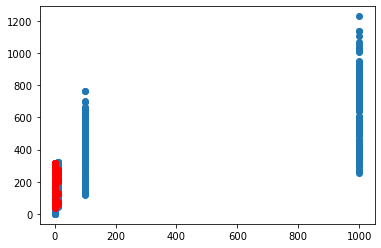

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X.PeptideDensity,y)
plt.scatter(X.PeptideDensity.head(200),Pred,c = "red")